In [1]:
%cd /home/jovyan/PyOpenWorm
!whoami
import PyOpenWorm as P
P.connect('PyOpenWorm/default.conf')

/home/jovyan/PyOpenWorm
jovyan


In [2]:
net = P.Worm().get_neuron_network()
G = net.as_networkx()

Let's have a look at all neurons that are pre-synaptic from the known motor neurons that innervate muscles

API From: https://networkx.github.io/documentation/networkx-1.9/tutorial/tutorial.html#directed-graphs

In [3]:
motor_neurons = ['DB1', 'DB2', 'DB3', 'DB4', 'DB5', 'DB6', 'DB7', \
                 'DD1', 'DD2', 'DD3', 'DD4', 'DD5', 'DD6', \
                 'VB1', 'VB2', 'VB3', 'VB4', 'VB5', 'VB6', 'VB7', 'VB8', 'VB9', 'VB10', 'VB11', \
                 'VD1', 'VD2', 'VD3', 'VD4', 'VD5', 'VD6', 'VD7', 'VD8', 'VD9', 'VD10', 'VD11', 'VD12', 'VD13', \
                 'DA1', 'DA2', 'DA3', 'DA4', 'DA5', 'DA6', 'DA7', 'DA8', 'DA9', \
                 'VA1', 'VA2', 'VA3', 'VA4', 'VA5', 'VA6', 'VA7', 'VA8', 'VA9', 'VA10', 'VA11', 'VA12', \
                 'AS1', 'AS2', 'AS3', 'AS4', 'AS5', 'AS6', 'AS7', 'AS8', 'AS9', 'AS10', 'AS11']
pre_synaptic = set()
for m in motor_neurons:
    p = list(G.predecessors(m))
    print(m + ": " + str(p))
    for n in p:
        pre_synaptic.add(n)

DB1: ['AIBR', 'AS2', 'AVBR', 'DB2', 'DB4', 'DVA', 'RID', 'RIS', 'VB3', 'VB4']
DB2: ['AVBR', 'DB1', 'DB3', 'DVA', 'PVCL', 'PVCR', 'PVR', 'VB1']
DB3: ['AVAR', 'AVBL', 'AVBR', 'AVER', 'DA3', 'DA4', 'DB2', 'DB4', 'DVA', 'PVCL', 'PVCR', 'PVR']
DB4: ['AVBL', 'AVBR', 'AVDR', 'DA5', 'DB1', 'DB3', 'DVA', 'VC2', 'PVCL', 'PVCR', 'VB2', 'VB4']
DB5: ['AVAL', 'AVAR', 'AVBL', 'AVBR', 'DVA', 'PVCL', 'PVCR']
DB6: ['AVAL', 'AVAR', 'AVBL', 'AVBR', 'DVA', 'PVCL', 'PVCR']
DB7: ['AVBL', 'AVBR', 'DVA', 'PVCL', 'PVCR', 'VA12']
DD1: ['AS2', 'AS3', 'AVBR', 'AVL', 'DA1', 'DA2', 'DB1', 'DD2', 'VC2', 'VC3', 'VD1', 'VD2', 'PVNL', 'PVQR', 'RID', 'VA1', 'VA2', 'VA3', 'VB1', 'VB2', 'VC1']
DD2: ['AS5', 'DA3', 'DA4', 'DB2', 'DB3', 'DD1', 'DD3', 'VC2', 'VC3', 'VD4', 'PVPR', 'RID', 'VA3', 'VA4', 'VA5', 'VB2', 'VB3', 'VB4', 'VC1']
DD3: ['DB3', 'DB4', 'DD2', 'DD4', 'VC2', 'VC3', 'PVNR', 'RID', 'VA5', 'VA6', 'VA7', 'VB4', 'VB5', 'VC1']
DD4: ['DD3', 'VC3', 'VD8', 'VA7', 'VA8', 'VA9', 'VB6', 'VB7']
DD5: ['VD10', 'PVDL', 'VA9',

Let's now find out what are the set of those neurons pre-synaptic to the muscle cells, excluding cells known to be involved with the vulval muscles:

In [7]:
mneurons = set(motor_neurons)

#Based on descriptions: http://www.wormatlas.org/neurons/Individual%20Neurons/Neuronframeset.html
vulval = set(['VC1', 'VC2', 'VC3','VC4', 'VC5', 'VC6', 'HSNL', 'HSNR'])
    
candidate_reservoir = pre_synaptic.difference(mneurons).difference(vulval)
print (candidate_reservoir)

{'PVDL', 'AVG', 'PHCR', 'AVL', 'PDB', 'PHAR', 'RIS', 'PVQR', 'DVC', 'AIBR', 'SABVL', 'SABVR', 'FLPR', 'RIFL', 'SMDVR', 'AVFL', 'PVPR', 'AVEL', 'PVNR', 'PHBR', 'RID', 'AVFR', 'AVBL', 'AVAR', 'PVCL', 'AVDR', 'PVR', 'PDA', 'PHCL', 'DVA', 'RIGL', 'PDER', 'PVDR', 'DVB', 'PHBL', 'AVM', 'PVNL', 'SABD', 'PVPL', 'PDEL', 'PVWL', 'PVWR', 'AVKL', 'AVDL', 'AVER', 'PLMR', 'AVAL', 'AVBR', 'AIZL', 'SMDDR', 'PVCR', 'AVHL'}


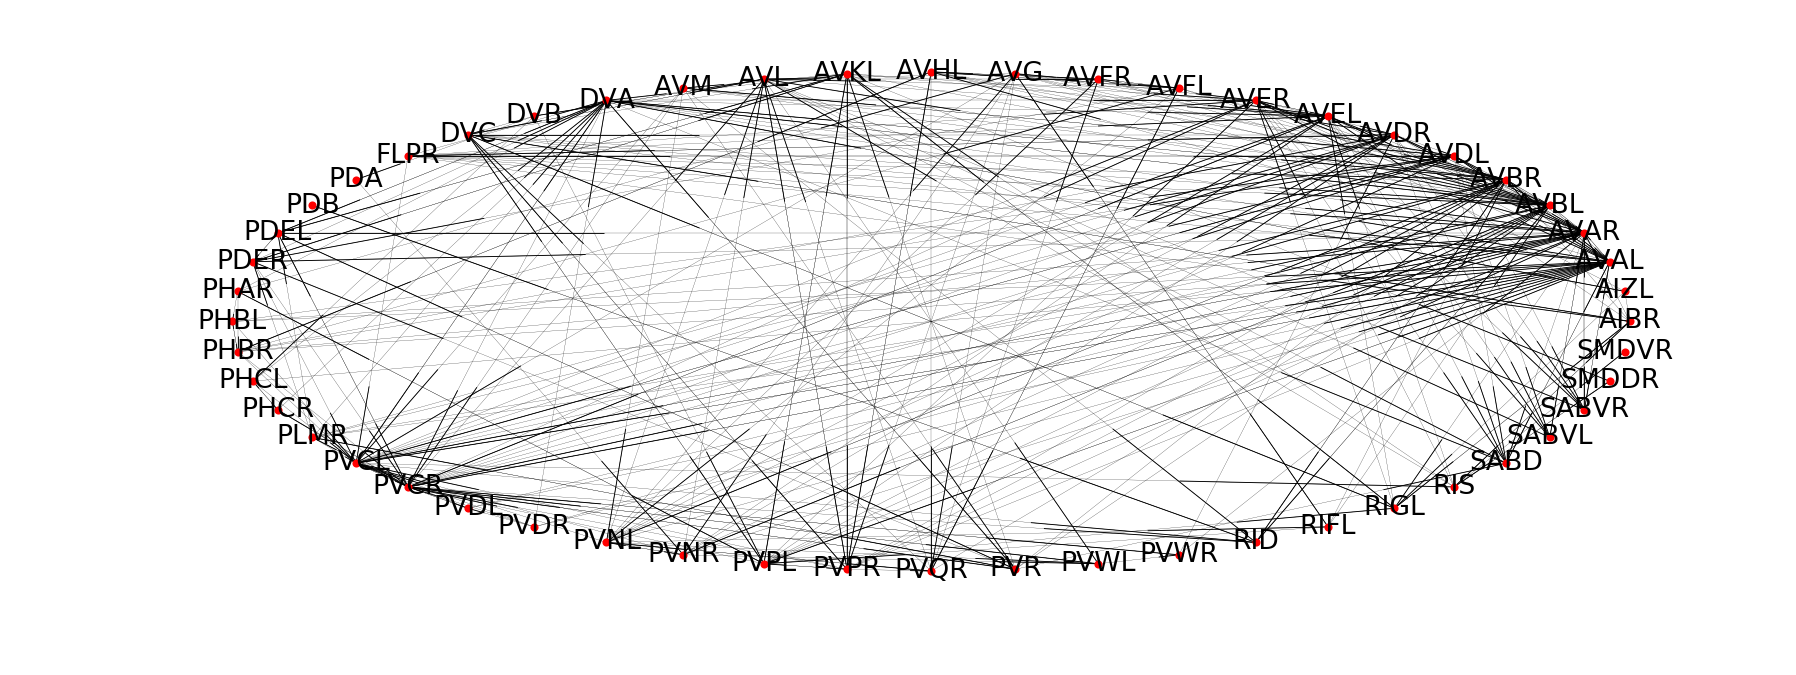

In [82]:
import networkx as nx
H = G.subgraph(list(candidate_reservoir))
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 5), dpi= 160, facecolor='w', edgecolor='k')
plt.subplot(121)
options = {'with_labels': 'True', 'node_color': 'red','node_size': 7,'width': 0.1}
nx.draw_circular(H,  **options)

### The C. elegans 'Rich Club' as defined by http://www.jneurosci.org/cgi/doi/10.1523/JNEUROSCI.3784-12.2013

In [67]:
rich_club = set(['AVAR', 'AVAL', 'AVBL', 'AVBR', 'AVER', \
             'AVDR', 'AVEL', 'PVCL', 'PVCR', 'DVA', \
             'AVDL', 'AIBR', 'RIBL', 'RIAR'])

What neurons are in the rich club that are not in our candidate reservoir?

In [68]:
rich_club.difference(candidate_reservoir.intersection(rich_club))

{'RIAR', 'RIBL'}

Almost all of them.  The ones that are left out are the least hyperconnected of the traditional rich club.  All the others are the most connected.  Which makes sense

What are the candidate reservoir neurons that are NOT in the rich club?

In [73]:
c = candidate_reservoir.difference(rich_club)
print(c)
len(c)

{'PVDL', 'AVG', 'PHCR', 'AVL', 'PDB', 'PHAR', 'RIS', 'PVQR', 'DVC', 'SABVR', 'SABVL', 'FLPR', 'RIFL', 'SMDVR', 'AVFL', 'PVPR', 'PVNR', 'PHBR', 'RID', 'AVFR', 'PVR', 'PDA', 'PHCL', 'RIGL', 'PDER', 'PVDR', 'DVB', 'PHBL', 'AVM', 'PVNL', 'SABD', 'PVPL', 'PDEL', 'PVWL', 'PVWR', 'AVKL', 'PLMR', 'AIZL', 'SMDDR', 'AVHL'}


40

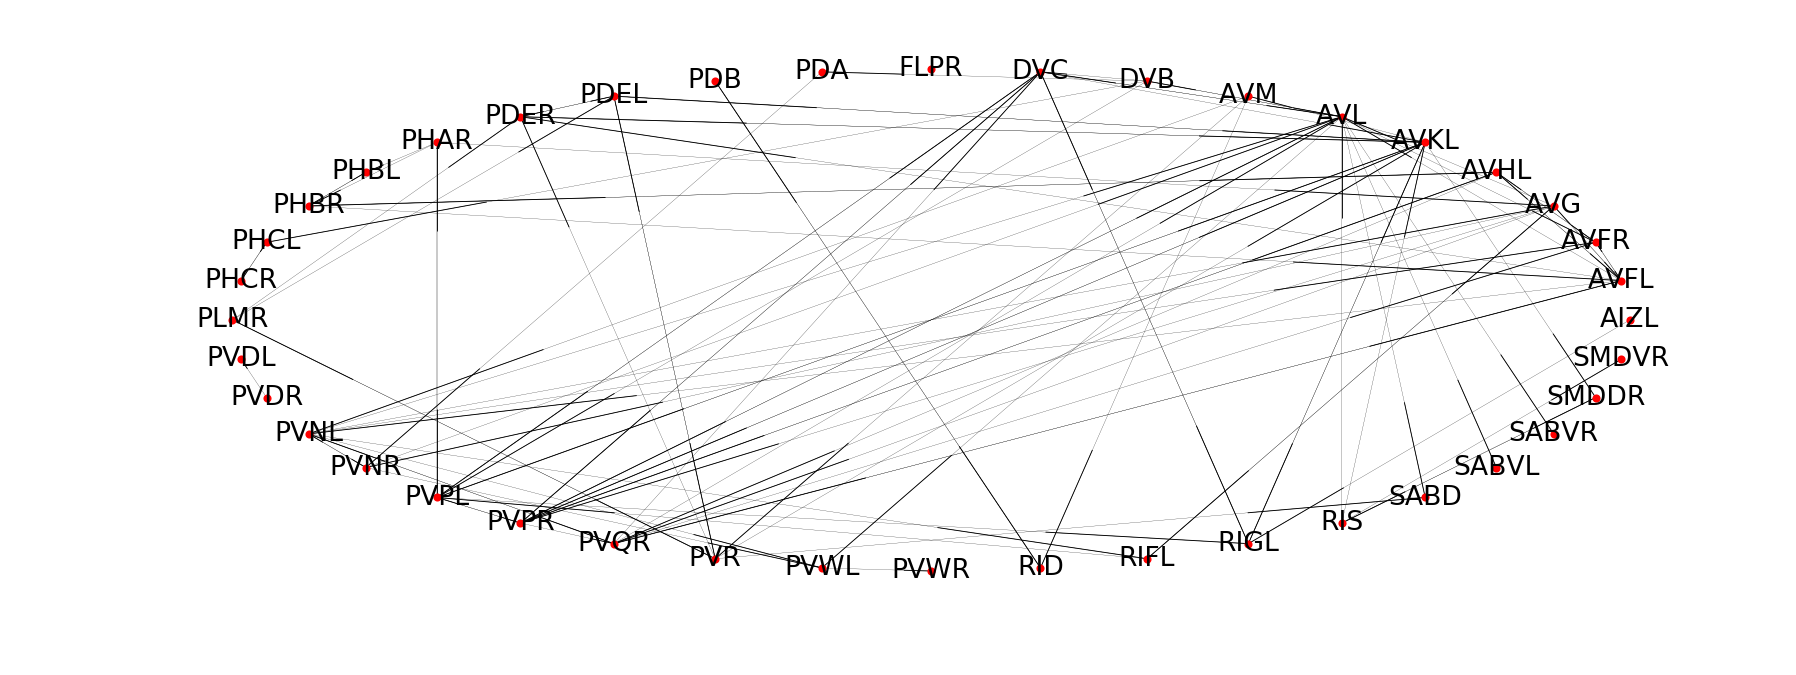

In [85]:
H2 = G.subgraph(list(c))
plt.figure(figsize=(30, 5), dpi= 160, facecolor='w', edgecolor='k')
plt.subplot(122)

options = {'with_labels': 'True', 'node_color': 'red','node_size': 7,'width': 0.1}
nx.draw_circular(H2,  **options)